In [0]:
import numpy as np
import pandas as pd

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/")

In [6]:
!pip install surprise

     |████████████████████████████████| 3.3MB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/ec/c0/55/3a28eab06b53c220015063ebbdb81213cd3dcbb72c088251ec
Successfully built scikit-surprise


In [0]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))

# 1. Read and explore the dataset. (Rename column, plot histograms, find data characteristics)

In [0]:
column = ['UserID', 'Item', 'Rating', 'TimeStamp']

In [0]:
df = pd.read_csv('ratings_Electronics.csv', names=column)

In [8]:
df.head()

,UserID,Item,Rating,TimeStamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [9]:
df.shape

(7824482, 4)

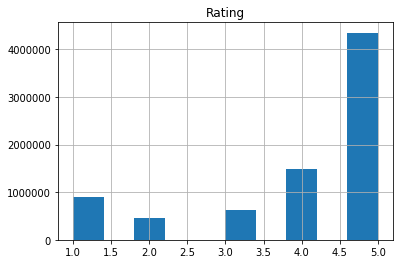

In [10]:
plt = df.hist(column='Rating')

In [0]:
# Mostly users have given the rating 5 to products. So number of users for the 5 ratings are more

In [0]:
# Find the top 10 most popular Products Reviewed

In [13]:
df.Item.value_counts().head(20)

B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
B003ELYQGG    11617
B003ES5ZUU    10276
B007R5YDYA     9907
B00622AG6S     9823
B0002L5R78     9487
B008OHNZI0     8966
B003LR7ME6     8840
B000LRMS66     8715
B009SYZ8OC     8370
B00BGA9WK2     7561
B004QK7HI8     7060
B009A5204K     7059
B00BGGDVOO     6893
B0098F5W0Q     6616
B002MAPRYU     6599
Name: Item, dtype: int64

In [14]:
print("total unique users - ",len(df["UserID"].unique()))

total unique users -  4201696


In [15]:
# Top users who has provided the reviews the most
df["UserID"].value_counts().head()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: UserID, dtype: int64

# 2. Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )

In [0]:
# I am taking the user who has contributed in more than 50 reviews

In [0]:
data = df.UserID.value_counts().reset_index(name="count").query("count > 150")["index"]

In [38]:
data.shape

(98,)

In [0]:
data = data.unique()

In [0]:
df = df[df.UserID.isin([key for key in data])]

In [41]:
df.shape

(21810, 4)

In [0]:
# Now we have the data for users who are present in more than 50 reviews

# 3. Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
data = Dataset.load_from_df(df[['UserID', 'Item', 'Rating']], reader)

In [0]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.30,random_state=123)


In [45]:
df[(df.UserID==trainset.to_raw_uid(0)) & (df.Item == trainset.to_raw_iid(0))]

,UserID,Item,Rating,TimeStamp
7820967,A3W4D8XOGLWUN5,B00KC7VY3S,4.0,1403136000


# 4. Build Popularity Recommender model.

In [0]:
# I am leaving this as am not finding a way to get Popularity based recommender model with Surprise Library which was taught to us.

# 5. Build Collaborative Filtering model

In [46]:
# user item rating data can be obtained as follows
user_records = trainset.ur
type(user_records)

collections.defaultdict

In [47]:
user_records[0]

[(0, 4.0),
 (81, 4.0),
 (195, 3.0),
 (278, 4.0),
 (306, 4.0),
 (445, 4.0),
 (501, 5.0),
 (897, 4.0),
 (957, 4.0),
 (1071, 3.0),
 (1363, 4.0),
 (1480, 4.0),
 (1530, 4.0),
 (1592, 4.0),
 (1691, 4.0),
 (1789, 3.0),
 (2013, 2.0),
 (2060, 3.0),
 (237, 4.0),
 (2958, 4.0),
 (457, 4.0),
 (3249, 4.0),
 (3319, 4.0),
 (3538, 4.0),
 (1621, 4.0),
 (3713, 4.0),
 (3842, 4.0),
 (654, 4.0),
 (3986, 4.0),
 (4003, 4.0),
 (4036, 4.0),
 (4153, 4.0),
 (3483, 5.0),
 (4247, 2.0),
 (4371, 5.0),
 (4394, 4.0),
 (4533, 3.0),
 (4573, 3.0),
 (4600, 3.0),
 (4657, 4.0),
 (4798, 3.0),
 (4825, 4.0),
 (4858, 4.0),
 (4873, 4.0),
 (5009, 4.0),
 (5111, 5.0),
 (5149, 4.0),
 (5168, 3.0),
 (5235, 4.0),
 (5271, 4.0),
 (5332, 4.0),
 (5495, 4.0),
 (5507, 4.0),
 (5778, 4.0),
 (4658, 2.0),
 (5935, 5.0),
 (5974, 5.0),
 (2433, 3.0),
 (6209, 4.0),
 (5630, 5.0),
 (6251, 5.0),
 (6350, 4.0),
 (6412, 4.0),
 (6604, 4.0),
 (2124, 4.0),
 (2903, 4.0),
 (6763, 5.0),
 (6994, 3.0),
 (4521, 4.0),
 (7083, 4.0),
 (7111, 4.0),
 (425, 4.0),
 (7258, 

In [48]:
trainset.to_raw_iid(0)

'B00KC7VY3S'

In [49]:
trainset.to_raw_uid(0)

'A3W4D8XOGLWUN5'

In [50]:
df[(df.UserID==trainset.to_raw_uid(0)) & (df.Item == trainset.to_raw_iid(0))]

,UserID,Item,Rating,TimeStamp
7820967,A3W4D8XOGLWUN5,B00KC7VY3S,4.0,1403136000


In [51]:
for keys in user_records.keys():
    print(keys)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97


In [52]:
user_records[0]

[(0, 4.0),
 (81, 4.0),
 (195, 3.0),
 (278, 4.0),
 (306, 4.0),
 (445, 4.0),
 (501, 5.0),
 (897, 4.0),
 (957, 4.0),
 (1071, 3.0),
 (1363, 4.0),
 (1480, 4.0),
 (1530, 4.0),
 (1592, 4.0),
 (1691, 4.0),
 (1789, 3.0),
 (2013, 2.0),
 (2060, 3.0),
 (237, 4.0),
 (2958, 4.0),
 (457, 4.0),
 (3249, 4.0),
 (3319, 4.0),
 (3538, 4.0),
 (1621, 4.0),
 (3713, 4.0),
 (3842, 4.0),
 (654, 4.0),
 (3986, 4.0),
 (4003, 4.0),
 (4036, 4.0),
 (4153, 4.0),
 (3483, 5.0),
 (4247, 2.0),
 (4371, 5.0),
 (4394, 4.0),
 (4533, 3.0),
 (4573, 3.0),
 (4600, 3.0),
 (4657, 4.0),
 (4798, 3.0),
 (4825, 4.0),
 (4858, 4.0),
 (4873, 4.0),
 (5009, 4.0),
 (5111, 5.0),
 (5149, 4.0),
 (5168, 3.0),
 (5235, 4.0),
 (5271, 4.0),
 (5332, 4.0),
 (5495, 4.0),
 (5507, 4.0),
 (5778, 4.0),
 (4658, 2.0),
 (5935, 5.0),
 (5974, 5.0),
 (2433, 3.0),
 (6209, 4.0),
 (5630, 5.0),
 (6251, 5.0),
 (6350, 4.0),
 (6412, 4.0),
 (6604, 4.0),
 (2124, 4.0),
 (2903, 4.0),
 (6763, 5.0),
 (6994, 3.0),
 (4521, 4.0),
 (7083, 4.0),
 (7111, 4.0),
 (425, 4.0),
 (7258, 

In [53]:
# However the ids are the inner ids and not the raw ids
# raw ids can be obatined as follows

print(trainset.to_raw_uid(0))
print(trainset.to_raw_iid(1066))

A3W4D8XOGLWUN5
B001120WQ8


In [0]:
from surprise import KNNWithMeans
from surprise import accuracy

In [55]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [56]:
# Evaluating Model Performance

len(testset)

6543

In [57]:
testset[0:5]

[('ABQWMANK4AR63', 'B002V8C3W2', 4.0),
 ('A3J8A5L5AF5TX9', 'B001O4EPHA', 5.0),
 ('A3V7D0LH8L7BG0', 'B000QSF2FY', 4.0),
 ('A1ODOGXEYECQQ8', 'B001QFYCXO', 3.0),
 ('A1UQBFCERIP7VJ', 'B0009U7XH4', 5.0)]

In [58]:
# Evalute on test set
test_pred = algo.test(testset)

# compute RMSE
accuracy.rmse(test_pred)

RMSE: 1.0241


1.0241147290103727

In [59]:
test_pred[0]

Prediction(uid='ABQWMANK4AR63', iid='B002V8C3W2', r_ui=4.0, est=5, details={'actual_k': 0, 'was_impossible': False})

In [60]:
# View a particular prediction
test_pred[12]

# To access a particular value, say estimate simply mention test_pred[12].est

Prediction(uid='A34BZM6S9L7QI4', iid='B008BERH08', r_ui=5.0, est=4.0, details={'actual_k': 0, 'was_impossible': False})

In [61]:
test_pred[12].details["actual_k"]

0

In [0]:
#Generating Top N Reccomendations
testset_new = trainset.build_anti_testset()


In [67]:
len(testset_new)

991781

In [68]:
testset_new[0:5]

[('A3W4D8XOGLWUN5', 'B004SD2562', 4.312176590030785),
 ('A3W4D8XOGLWUN5', 'B00BXF5FVU', 4.312176590030785),
 ('A3W4D8XOGLWUN5', 'B004Z9XZHM', 4.312176590030785),
 ('A3W4D8XOGLWUN5', 'B009SPUY5O', 4.312176590030785),
 ('A3W4D8XOGLWUN5', 'B0044CL1N0', 4.312176590030785)]

In [0]:
predictions = algo.test(testset_new[0:10000])

In [70]:
predictions[0]

Prediction(uid='A3W4D8XOGLWUN5', iid='B004SD2562', r_ui=4.312176590030785, est=1, details={'actual_k': 0, 'was_impossible': False})

In [0]:
predictions_df = pd.DataFrame([[x.uid,x.est, x.iid] for x in predictions])

In [72]:
predictions_df.head(1)

,0,1,2
0,A3W4D8XOGLWUN5,1.0,B004SD2562


In [0]:
predictions_df.columns = ["userId","est_rating", "item"]
predictions_df.sort_values(by = ["userId", "est_rating"],ascending=False,inplace=True)

In [0]:
top_10_recos = predictions_df.groupby("userId").head(10).reset_index(drop=True)

In [75]:
top_10_recos

,userId,est_rating,item
0,A3W4D8XOGLWUN5,5.0,B004Z9XZHM
1,A3W4D8XOGLWUN5,5.0,B0044CL1N0
2,A3W4D8XOGLWUN5,5.0,B002JKEM58
3,A3W4D8XOGLWUN5,5.0,B008EQYRRY
4,A3W4D8XOGLWUN5,5.0,B001HU4ASU
5,A3W4D8XOGLWUN5,5.0,B0011FQUUW
6,A3W4D8XOGLWUN5,5.0,B00011KM38
7,A3W4D8XOGLWUN5,5.0,B0064IBPJM
8,A3W4D8XOGLWUN5,5.0,B008S8WA18
9,A3W4D8XOGLWUN5,5.0,B00026Q16O
